In [29]:
# ==========================================================
# Setup de l'environnement pour l'IA
# ==========================================================
from pathlib import Path
import sys
import pandas as pd
from litellm import completion

PROJECT_ROOT = Path.cwd()
sys.path.append(str(PROJECT_ROOT))

from pipeline.main import run_pipeline_geo
from pipeline.storage import load_parquet




In [30]:
# ==========================================================
# Exécution du pipeline GEO pour fournir le dataset à l'IA
# ==========================================================
addresses = [
    "10 Rue de Rivoli 75004 Paris",
    "5 Avenue des Champs Elysées 75008 Paris",
    "1 Place Bellecour 69002 Lyon"
]
stats = run_pipeline_geo(addresses, max_items=3)
df = load_parquet(stats["output_path"])



🚀 PIPELINE GEO

🌍 ÉTAPE 1 : Enrichissement (géocodage + commune)


Enrichissement GEO: 100%|████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.25s/it]


   💾 Brut: geo_enriched_raw_20251216_211630.json (1.0 KB)

🔧 ÉTAPE 2 : Transformation et nettoyage

📊 ÉTAPE 3 : Analyse de qualité
   Note: A
   Complétude: 100.0%
   Doublons: 0.0%

💾 ÉTAPE 4 : Stockage final
   💾 Parquet: geo_dataset_20251216_211630.parquet (6.4 KB)

✅ PIPELINE GEO TERMINÉ
Durée: 4s
Adresses enrichies: 3
Qualité: A
Fichier: C:\Users\l1369\Desktop\tp2-exploration\data\processed\geo_dataset_20251216_211630.parquet


In [9]:


# ==========================================================
# Utiliser LLaMA 3.2 locale pour recommandations IA
# ==========================================================
prompt_enrichissement = """
Je veux enrichir mes données de l'API Adresse avec l'API Geo Communes.

Données principales : une liste d'adresses postales
Enrichissement souhaité : ajouter la commune, le code postal, la population et la région

Comment adapter le module enricher.py pour automatiser cela ?
"""

response_enrich = completion(
    model="ollama/llama3.2",  
    messages=[{"role": "user", "content": prompt_enrichissement}],
    api_base="http://localhost:11434"  
)

print("=== Recommandations IA pour l'enrichissement ===")
 
texte_ia = response_enrich.choices[0].message.content

# Afficher dans le notebook
print(texte_ia)


=== Recommandations IA pour l'enrichissement ===
Pour enrichir vos données de l'API Adresse avec les données de l'API Geo Communes, vous pouvez utiliser des APIs tierces comme Nominatim ou OpenCage Geocoder. Dans cet exemple, nous allons utiliser la bibliothèque `requests` pour faire des requêtes à ces APIs.

### Étape 1 : Installation des dépendances

Téléchargez les dépendances nécessaires avec pip :
```bash
pip install requests geopy
```

### Étape 2 : Modification de votre fichier enricher.py

Modifiez le fichier `enricher.py` pour inclure la bibliothèque `geopy` et l'API Geo Communes. Voici un exemple :

```python
import requests
from geopy.geocoding import Nominatim
from geopy.exc import GeopyException

# Configuration des API
nomatiem_api = 'https://nominatim.org/search'
geo_communes_api = 'https://api.geoportail.fr/carte/commune'

def enricher(adresse):
    # Rechercher l'adresse sur Nominatim
    response_nomatiem = requests.get(nomatiem_api, params={
        "q": adresse,
   

In [11]:
# ==========================================================
# Suggestions et génération de code d'analyse avec LLaMA
# ==========================================================

# Préparer le contexte du dataset pour l'IA
context = f"""
Je dispose d'un dataset GEO avec {len(df)} adresses, incluant les colonnes :
- address
- city
- score (qualité géocodage)
- latitude
- longitude

La qualité globale du dataset est : {qa_metrics.quality_grade}.
Complétude : {qa_metrics.completeness_score*100:.1f}%
Doublons : {qa_metrics.duplicates_pct:.1f}%

Je souhaite que tu me proposes directement du code Python prêt à exécuter pour :
1. Analyses statistiques ou agrégations intéressantes
2. Graphiques ou visualisations pertinentes avec Plotly
3. Idées pour explorer les anomalies ou tendances géographiques

Le code doit utiliser uniquement `pandas` et `plotly.express` et être directement applicable sur mon dataframe `df`.
"""

# Appel à LLaMA 3.2 locale
response_analysis = completion(
    model="ollama/llama3.2",
    messages=[{"role": "user", "content": context}],
    api_base="http://localhost:11434"
)

# Extraire le texte/code généré par le modèle
code_ia = response_analysis.choices[0].message.content

# Afficher le code suggéré
print("=== Code IA pour analyses et visualisations ===\n")
print(code_ia)


=== Code IA pour analyses et visualisations ===

### Code Python Utilisant pandas et plotly.express

Voici un exemple de code Python qui vous permet d'analyser les données, de visualiser des graphiques et d'explorer les anomalies géographiques :

```python
import pandas as pd
import plotly.express as px

# Charger le dataframe
df = df.copy()  # Assurez-vous que df est défini dans votre environnement

### 1. Analyses Statistiques et Agrégations Interessantes

### Nombre de villes par catégorie de score géocodage qualité
score_categories = pd.cut(df['score'], bins=[0, 1, 2], labels=['Très mauvaise', 'Mauvaise', 'Aucune'])
print("Nombre de villes par catégorie de score :")
print(score_categories.value_counts())

### Écart-type des coordonnées géographiques
latitude_mean = df['latitude'].mean()
longitude_mean = df['longitude'].mean()
print("\nÉcart-type des coordonnées géographiques :")
print(f"Écart-type latitudinaire : {df['latitude'].std()}")
print(f"Écart-type longitudinal : {df['longi

In [24]:
import pandas as pd
import plotly.express as px

# Copier le dataframe pour travailler dessus
df_analysis = df.copy()


In [25]:
# ==========================================================
#  Analyses statistiques et agrégations
# ==========================================================
# Catégories de score : faible, moyen, élevé
score_categories = pd.cut(df_analysis['score'], bins=[0, 0.5, 0.8, 1], labels=['Faible', 'Moyen', 'Élevé'])
df_analysis['score_category'] = score_categories

print("Nombre de villes par catégorie de score :")
print(df_analysis['score_category'].value_counts())

print("\nÉcart-type des coordonnées géographiques :")
print(f"Latitude : {df_analysis['latitude'].std():.4f}")
print(f"Longitude : {df_analysis['longitude'].std():.4f}")


Nombre de villes par catégorie de score :
score_category
Élevé     3
Faible    0
Moyen     0
Name: count, dtype: int64

Écart-type des coordonnées géographiques :
Latitude : 1.7909
Longitude : 1.4392


C:\Users\l1369\AppData\Local\Temp\ipykernel_10972\1134481562.py:5: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig_map = px.scatter_mapbox(


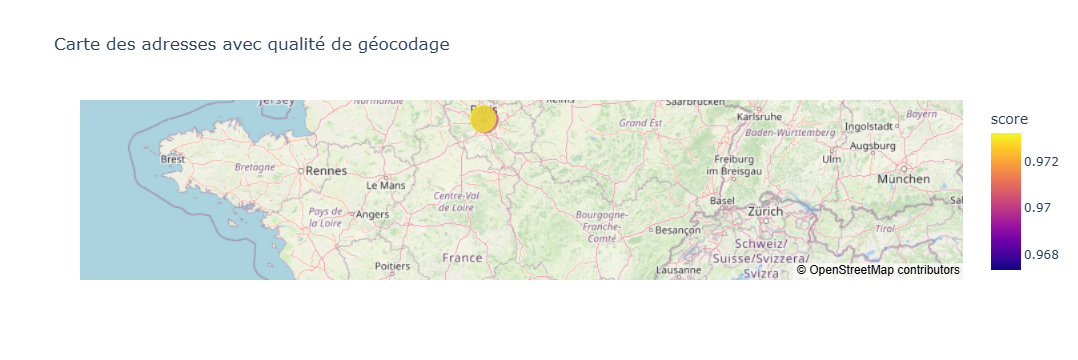

In [14]:
# ==========================================================
#  Graphiques / Visualisations avec Plotly
# ==========================================================
# Carte interactive des adresses avec score
fig_map = px.scatter_mapbox(
    df_analysis,
    lat='latitude',
    lon='longitude',
    color='score',
    hover_name='address',
    size='score',  # taille selon la qualité
    zoom=5,
    title="Carte des adresses avec qualité de géocodage"
)
fig_map.update_layout(mapbox_style="open-street-map")
fig_map.show()


In [15]:
# ==========================================================
#  Exploration des anomalies et tendances
# ==========================================================
# Vérification des doublons
if df_analysis.duplicated().sum() == 0:
    print("\nAucun doublon dans le dataset.")
else:
    print(f"\nIl existe {df_analysis.duplicated().sum()} doublons dans le dataset.")

# Identifier anomalies : score faible (<0.5)
df_analysis['anomalie'] = df_analysis['score'].apply(lambda x: "Anomalie" if x < 0.5 else "")
print("\nAdresses avec anomalies géographiques :")
print(df_analysis[df_analysis['anomalie'] == "Anomalie"][['address','score','anomalie']])



Aucun doublon dans le dataset.

Adresses avec anomalies géographiques :
Empty DataFrame
Columns: [address, score, anomalie]
Index: []


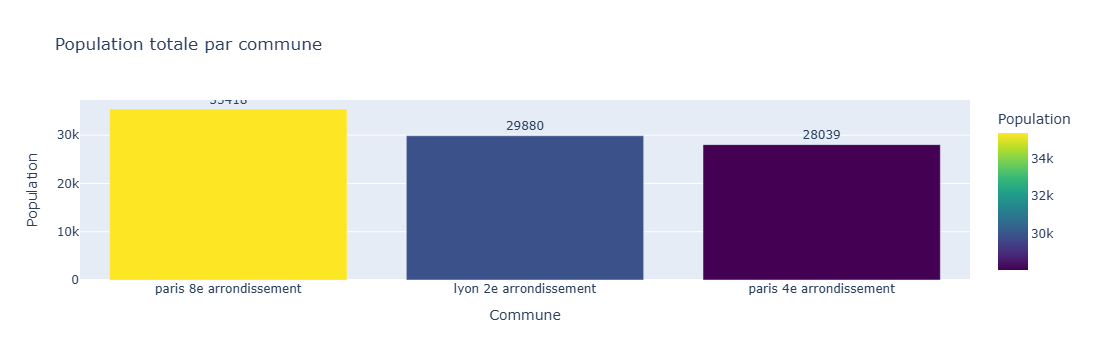

In [31]:
# ==========================================================
#  Visualisation de la population par commune
# ==========================================================
# On agrège la population par commune
population_par_commune = df_analysis.groupby('commune')['population'].sum().reset_index()

# Tri pour visualisation (communes les plus peuplées en haut)
population_par_commune = population_par_commune.sort_values('population', ascending=False)

# Graphique en barres avec Plotly
fig_pop = px.bar(
    population_par_commune,
    x='commune',
    y='population',
    text='population',
    title="Population totale par commune",
    labels={'commune': 'Commune', 'population': 'Population'},
    color='population',
    color_continuous_scale='Viridis'
)
fig_pop.update_traces(texttemplate='%{text}', textposition='outside')
fig_pop.show()

#  Cette visualisation permet de voir rapidement les communes les plus peuplées dans notre dataset
